# 분류모델_모델핸들링(성능향상기법)

# 1) 타이타닉 데이터 info


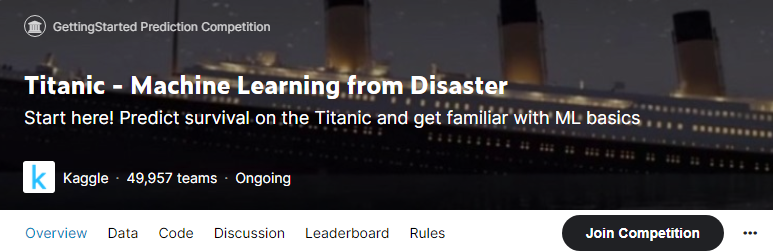

대회 링크: https://www.kaggle.com/c/titanic


Kaggle에서 제공하는 타이타닉 탑승자 데이터이다. 

변수 설명:
* PassengerID: 탑승객 번호
* Pclass: 티켓 등급 (1=1등급, 2=2등급, 3=3등급)
* Name: 탑승객 이름
* Sex: 성별 (female=여성, male=남성)
* Age: 연령
* SibSP: 타이타닉호에 탑승한 형제/배우자의 수
* Parch: 타이타닉호에 탑승한 부모/자녀의 수
* Ticket: 티켓 번호
* Fare: 요금
* Cabin: 객실 번호
* Embarked: 탑승 항구 위치 (C=Cherbourg, Q=Queenstown, S=Southampton)

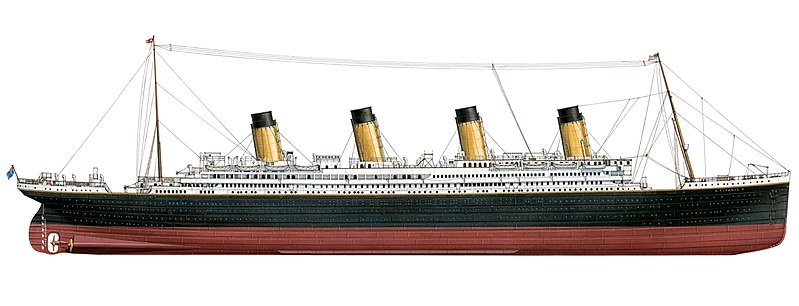

출처: https://commons.wikimedia.org/wiki/File:Titanic_Stardboard_Side_Diagram.jpg#file

# 2) 라이브러리 import

In [2]:
import pickle
from google.colab import drive

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 3) 데이터 로드

In [3]:
# Google dirve에 연결

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# train, test pickle 파일을 불러오기
# 본인 폴더 path 입력하기!!!
PATH = '/content/drive/MyDrive/LectureSpace/[알파코]딥러닝4기/PART1. 텍스트마이닝/데이터/'

X_train_le = pd.read_pickle(PATH + 'X_train_le.pkl')
y_train_le = pd.read_pickle(PATH + 'y_train_le.pkl')
X_test_le = pd.read_pickle(PATH + 'X_test_le.pkl')

X_train_oh = pd.read_pickle(PATH + 'X_train_oh.pkl')  
y_train_oh = pd.read_pickle(PATH + 'y_train_oh.pkl')
X_test_oh = pd.read_pickle(PATH + 'X_test_oh.pkl')

In [7]:
# Label Encoding된 데이터 크기 출력
print(X_train_le.shape, y_train_le.shape, X_test_le.shape)

(891, 5) (891,) (418, 5)


In [8]:
# Onehot Encoding된 데이터 크기 출력
print(X_train_oh.shape, y_train_oh.shape, X_test_oh.shape)

(891, 15) (891,) (418, 15)


# 4) 모델링

### 4-1. 모델 생성

In [ ]:
dt = DecisionTreeClassifier(random_state=random_state)
dt.fit(x, y)

In [ ]:
# 분류모델을 담을 리스트 생성 
classifiers = []

# random_state 설정
random_state = 2

# 데이터프레임 생성을 위하여 알고리즘 제목 저장
clf_names = ['Decision Tree','Random Forest', 'AdaBoost', 'Extra Trees', 'Gradient Boost',
             'MLP', 'KNN', 'Support Vector', 'Logistic Regression', 'Linear Discrimination']

# 트리 기반 알고리즘
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

# 그 외 선형, 신경망 등의 알고리즘
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

교차검증이란?

학습 데이터를 일부를 학습에 사용하지 않고 검증할 데이터로 남겨두는 것이다. 이때 검증 데이터는 학습에 사용할 수 없게 되는 문제가 있어, 교차검증은 다음 그림과 같이 교차로 k번만큼 학습을 수행하여 모든 데이터를 학습에 사용하고 모든 데이터를 검증에 사용한다. 학습에서 과적합을 개선하는 장점이 잇다.

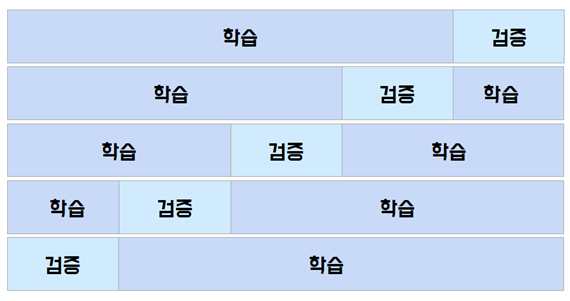

대표적인 교차검증 방법으로는 K fold와 Stratified K fold가 있다.

* `K fold`는 앞서 설명한 것처럼 k개의 데이터 폴드 세트를 만들어서 k번만큼 각 폴드세트에 학습과 검증을 수행하는 것이다.
* `Stratified K fold`는 k fold와 유사하다. 다만 k fold와는 달리 검증 데이터의 클래스 분포를 고려하여 데이터 폴드 세트를 만든다. 따라서 클래스 분포가 일정한 데이터 폴드 세트가 만들어지게 된다. 불균형한 y값을 가진 데이터에 사용한다. 예) 암을 진단할 때 대부분의 y값은 0이고 소수만 1이다.

`StratifiedKFold(n_splits)`
* 사이킷런에서 지원하는 Stratified K fold 클래스이다.
* n_splits로 몇 개의 데이터 폴드 세트를 만들 것인지를 설정한다.

참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

`cross_val_score(estimator, X, y, scoring, cv, n_jobs)`
* 사이킷런에서 제공하는 교차검증을 보다 간편하게 수행할 수 있는 클래스이다.
* estimator = 사용할 알고리즘
* X = X 데이터
* y = y 데이터
* scoring = 평가 지표
* cv = fold를 split하는 방식

참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
# 레이블인코딩된 데이터로 교차검증을 수행하여 리스트에 저장

kfold = StratifiedKFold(n_splits=10)

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_le, y = y_train_le,
                                      scoring = "accuracy", cv = kfold, n_jobs=4))


In [ ]:
# 교차검증 점수 리스트 출력
cv_results

[array([0.77777778, 0.78651685, 0.7752809 , 0.85393258, 0.86516854,
        0.79775281, 0.79775281, 0.76404494, 0.83146067, 0.79775281]),
 array([0.78888889, 0.79775281, 0.7752809 , 0.85393258, 0.85393258,
        0.80898876, 0.79775281, 0.75280899, 0.85393258, 0.80898876]),
 array([0.8       , 0.79775281, 0.76404494, 0.85393258, 0.86516854,
        0.79775281, 0.78651685, 0.76404494, 0.85393258, 0.78651685]),
 array([0.77777778, 0.78651685, 0.7752809 , 0.85393258, 0.86516854,
        0.80898876, 0.79775281, 0.75280899, 0.84269663, 0.79775281]),
 array([0.77777778, 0.7752809 , 0.78651685, 0.87640449, 0.82022472,
        0.78651685, 0.80898876, 0.75280899, 0.85393258, 0.82022472]),
 array([0.73333333, 0.78651685, 0.7752809 , 0.82022472, 0.83146067,
        0.7752809 , 0.83146067, 0.78651685, 0.84269663, 0.7752809 ]),
 array([0.77777778, 0.80898876, 0.7752809 , 0.80898876, 0.82022472,
        0.79775281, 0.80898876, 0.7752809 , 0.84269663, 0.86516854]),
 array([0.82222222, 0.76404494, 0.

`mean()`
* 데이터프레임에 적용시 산술 데이터를 갖는 모든 열의 평균값을 각각 계산한다.
* 특정 열에 적용시 해당 열의 평균값을 계산한다.

In [ ]:
# 첫 번째 모델(Decision Tree Classifier)의 평균 교차검증 점수 출력
cv_results[0].mean()

0.8047440699126092

`std()`
* 데이터프레임에 적용시 산술 데이터를 갖는 모든 열의 표준편차를 각각 계산한다.
* 특정 열에 적용시 해당 열의 표준편차를 계산한다.

In [ ]:
# 첫 번째 모델(Decision Tree Classifier)의 교차검증 점수 표준편차 출력
cv_results[0].std()

0.032426757785638

In [ ]:
# 모델들의 교차검증 점수의 평균과 표준편차를 계산하여 리스트에 저장
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
# 데이터프레임으로 변환
results_le = pd.DataFrame(cv_results, index=clf_names)
results_le

,0,1,2,3,4,5,6,7,8,9
Decision Tree,0.777778,0.786517,0.775281,0.853933,0.865169,0.797753,0.797753,0.764045,0.831461,0.797753
Random Forest,0.788889,0.797753,0.775281,0.853933,0.853933,0.808989,0.797753,0.752809,0.853933,0.808989
AdaBoost,0.800000,0.797753,0.764045,0.853933,0.865169,0.797753,0.786517,0.764045,0.853933,0.786517
Extra Trees,0.777778,0.786517,0.775281,0.853933,0.865169,0.808989,0.797753,0.752809,0.842697,0.797753
Gradient Boost,0.777778,0.775281,0.786517,0.876404,0.820225,0.786517,0.808989,0.752809,0.853933,0.820225
MLP,0.733333,0.786517,0.775281,0.820225,0.831461,0.775281,0.831461,0.786517,0.842697,0.775281
KNN,0.777778,0.808989,0.775281,0.808989,0.820225,0.797753,0.808989,0.775281,0.842697,0.865169
Support Vector,0.822222,0.764045,0.775281,0.842697,0.853933,0.775281,0.808989,0.764045,0.831461,0.775281
Logistic Regression,0.777778,0.764045,0.764045,0.820225,0.775281,0.775281,0.786517,0.741573,0.808989,0.764045
Linear Discrimination,0.788889,0.786517,0.764045,0.842697,0.797753,0.775281,0.764045,0.741573,0.808989,0.764045


In [ ]:
# 모델별 교차검증 점수 평균, 표준편차를 새로운 칼럼으로 추가
results_le['mean'] = cv_means
results_le['std'] = cv_std

`barplot(x, y, hue, data, order, pallete, orient)`
* Seaborn에서 제공하는 막대그래프이다.
* pallet = 막대그래프 색상 설정
* orient = 'v' 설정시 세로 막대그래프, 'h' 설정시 가로 막대그래프
* ** 사용시 파라미터 이외의 정보가 전달된다.
* **{'xerr':cv_std} 추가시 가로 방향의 오차막대(error bar)가 추가된다. 

참고: https://www.bing.com/search?q=seaborn+barplot+&qs=n&form=QBRE&sp=-1&pq=seaborn+barplot+&sc=8-16&sk=&cvid=545BA1EFFCBE4FD1BCE512E2FD75FCDC

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


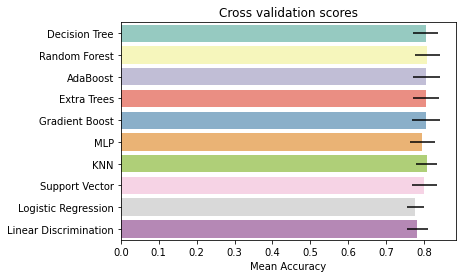

In [ ]:
#  모델별 교자검증 점수 평균 시각화
g = sns.barplot("mean",results_le.index ,data = results_le, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

`boxplot(x, y, hue, data, order, orient)`
* seaborn에서 제공하는 상자그림이다.
* orient = 'v' 설정시 세로 상자그림, 'h' 설정시 가로 상자그림

참고: https://seaborn.pydata.org/generated/seaborn.boxplot.html

`T`
* 데이터프레임에 '.T' 적용시 행/열이 전환된다.

In [ ]:
# 행/열 전환
results_le.T

,Decision Tree,Random Forest,AdaBoost,Extra Trees,Gradient Boost,MLP,KNN,Support Vector,Logistic Regression,Linear Discrimination
0,0.777778,0.788889,0.800000,0.777778,0.777778,0.733333,0.777778,0.822222,0.777778,0.788889
1,0.786517,0.797753,0.797753,0.786517,0.775281,0.786517,0.808989,0.764045,0.764045,0.786517
2,0.775281,0.775281,0.764045,0.775281,0.786517,0.775281,0.775281,0.775281,0.764045,0.764045
3,0.853933,0.853933,0.853933,0.853933,0.876404,0.820225,0.808989,0.842697,0.820225,0.842697
4,0.865169,0.853933,0.865169,0.865169,0.820225,0.831461,0.820225,0.853933,0.775281,0.797753
5,0.797753,0.808989,0.797753,0.808989,0.786517,0.775281,0.797753,0.775281,0.775281,0.775281
6,0.797753,0.797753,0.786517,0.797753,0.808989,0.831461,0.808989,0.808989,0.786517,0.764045
7,0.764045,0.752809,0.764045,0.752809,0.752809,0.786517,0.775281,0.764045,0.741573,0.741573
8,0.831461,0.853933,0.853933,0.842697,0.853933,0.842697,0.842697,0.831461,0.808989,0.808989
9,0.797753,0.808989,0.786517,0.797753,0.820225,0.775281,0.865169,0.775281,0.764045,0.764045


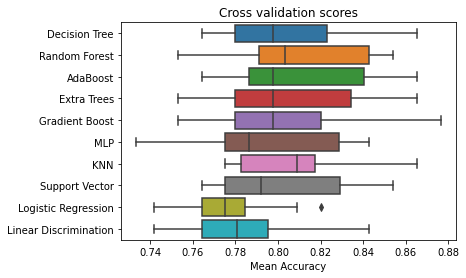

In [ ]:
# 모델별 교차검증 점수 시각화
results1 = results_le.drop(['mean', 'std'], axis=1)
g = sns.boxplot(data=results1.T, orient='h')
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
# # 교차검증 점수 평균이 높은 순으로 나열하여 데이터프레임 출력
# results_le = results_le.sort_values(by='mean', ascending=False)
# results_le

In [ ]:
# 인덱스 순서 저장
# index_sort = results_le.index

In [ ]:
# 원핫인코딩된 데이터로 교차검증을 수행하여 리스트에 저장

kfold = StratifiedKFold(n_splits=10)

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_oh, y = y_train_oh,
                                      scoring = "accuracy", cv = kfold, n_jobs=4))
    
# 모델들의 교차검증 점수의 평균과 표준편차를 계산하여 리스트에 저장
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
# 데이터프레임으로 변환
results_oh = pd.DataFrame(cv_results, index=clf_names)
results_oh

# 모델별 교차검증 점수 평균, 표준편차를 새로운 칼럼으로 추가
results_oh['mean'] = cv_means
results_oh['std'] = cv_std

# index_sort 나열하여 데이터프레임 출력
# results_oh = results_oh[index_sort]
results_oh

,0,1,2,3,4,5,6,7,8,9,mean,std
Decision Tree,0.788889,0.786517,0.775281,0.853933,0.865169,0.797753,0.786517,0.752809,0.842697,0.797753,0.804732,0.034771
Random Forest,0.800000,0.797753,0.775281,0.853933,0.853933,0.820225,0.786517,0.752809,0.865169,0.820225,0.812584,0.035105
AdaBoost,0.788889,0.786517,0.775281,0.853933,0.865169,0.808989,0.786517,0.764045,0.865169,0.808989,0.810350,0.035894
Extra Trees,0.788889,0.786517,0.786517,0.853933,0.865169,0.808989,0.786517,0.764045,0.853933,0.797753,0.809226,0.033557
Gradient Boost,0.777778,0.797753,0.797753,0.887640,0.853933,0.797753,0.808989,0.764045,0.853933,0.865169,0.820474,0.039288
MLP,0.811111,0.786517,0.797753,0.887640,0.831461,0.808989,0.808989,0.741573,0.831461,0.797753,0.810325,0.035334
KNN,0.788889,0.775281,0.707865,0.808989,0.820225,0.797753,0.775281,0.764045,0.865169,0.808989,0.791248,0.038966
Support Vector,0.822222,0.797753,0.775281,0.887640,0.820225,0.797753,0.775281,0.764045,0.853933,0.820225,0.811436,0.036220
Logistic Regression,0.800000,0.820225,0.786517,0.842697,0.808989,0.786517,0.764045,0.786517,0.853933,0.808989,0.805843,0.026075
Linear Discrimination,0.800000,0.831461,0.764045,0.853933,0.775281,0.775281,0.764045,0.741573,0.831461,0.820225,0.795730,0.035123


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


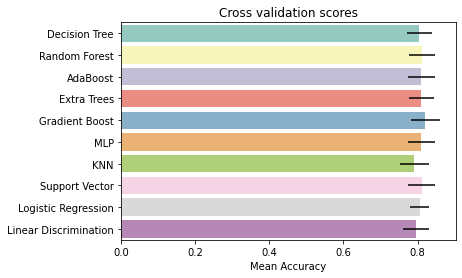

In [ ]:
#  모델별 교자검증 점수 평균 시각화
g = sns.barplot("mean",results_oh.index ,data = results_oh, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

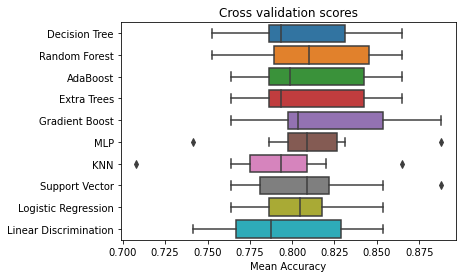

In [ ]:
# 모델별 교자검증 점수 시각화
results2 = results_oh.drop(['mean', 'std'], axis=1)
g = sns.boxplot(data=results2.T, orient='h')
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
# f, ax = plt.subplots(1,2, figsize=(20,7))
# results1 = results_le.drop(['mean', 'std'], axis=1)
# sns.boxplot(data=results1.T, orient='h', ax=ax[0])
# ax[0].set_title('Label Encoded data CV Accuracy Score \n')
# ax[0].set_xlabel('Accuracy Score (%)');

# results2 = results_oh.drop(['mean', 'std'], axis=1)
# sns.boxplot(data=results2.T, orient='h', ax=ax[1])
# ax[1].set_title('OneHot Encoded data CV Accuracy Score \n')
# ax[1].set_xlabel('Accuracy Score (%)');

# plt.show()

In [ ]:
# # g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
# # g.set_xlabel("Mean Accuracy")
# # g = g.set_title("Cross validation scores")

# f, ax = plt.subplots(1,2, figsize=(20,7))


# results2 = results_oh.drop(['mean', 'std'], axis=1)
# sns.barplot("mean",results_oh.index ,data = results_oh, palette="Set3",orient = "h",**{'xerr':cv_std}, ax=ax[1])
# ax[1].set_title('OneHot Encoded data CV Accuracy Score \n')
# ax[1].set_xlabel('Accuracy Score (%)');

# plt.show()

In [ ]:
# label encoded data와 onehot encoded data에 대한 교차검증 점수를 비교해보자.
mean_df = pd.DataFrame()
mean_df['Label Encoded data mean accuracy'] = results_le['mean']
mean_df['Onehot Encoded data mean accuracy'] = results_oh['mean']
mean_df

,Label Encoded data mean accuracy,Onehot Encoded data mean accuracy
Decision Tree,0.804744,0.804732
Random Forest,0.809226,0.812584
AdaBoost,0.806966,0.810350
Extra Trees,0.805868,0.809226
Gradient Boost,0.805868,0.820474
MLP,0.795805,0.810325
KNN,0.808115,0.791248
Support Vector,0.801323,0.811436
Logistic Regression,0.777778,0.805843
Linear Discrimination,0.783383,0.795730


* 우리 사례에서는 decision tree, knn을 제외한 대부분의 모델이 onehot encoded data에서 더 좋은 성능을 보였다.
* 따라서 이후부터는 onehot encoding을 적용한 데이터만을 사용하겠다.

## 4-2. 하이퍼 파라미터 튜닝

앞선 단계에서는 각 모델별로 파라미터를 조정하지 않고 교차검증 score을  계산하였다. 이번에는 최적의 하이퍼 파라미터 조합을 찾아 적용해 score를 개선해보자.

`GridSearchCV(모델, param_grid, cv, scoring, n_jobs, verbose)`
* 사이킷런에서 제공하는 대표적인 최적화 도구이다.
* fit() 메소드로 자동으로 복수 개의 내부 모형을 생성하고 실행하여 최적의 파라미터 조합을 찾는다.
* param_grid에 지정해준 후보 파라미터 개수에 비례하여 시간이 소모되기 때문에, 실행시간이 긴 단점이 있다.
* param_grid = 딕셔너리 형태의 파라미터의 목록으로 GridSearchCV로 탐색할 모든 파라미터이다.
* cv = 교차검증 방법 (StratifiedKFold/Kfold)
* verbose = 전달받는 메시지 양을 조절한다. 1보다 클 시에는 검증 때마다 시간과, 파라미터를 전달하고, 2보다 크게 설정할 시에는 검증 때마다 시간, 파라미터, 점수를 전달한다.

참고:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


`best_estimator_`
* best_estimator 속성에 Grid Search에서 가장 좋은 성능을 보였던 파라미터 조합이 저장되어 있다.

`best_score_`

* best_score 속성에 Grid Search에서 가장 좋았던 성능 점수가 저장되어 있다.

### Random Forest

`class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=None)`

주요 paramter:
  - 랜덤 포레스트의 파라미터는 BaggingClassifier와 DecisionTreeClassifier를 제어하는 파라미터를 모두 가지고 있다.(splitter, presort, max_samples, base_estimator를 제외한다.)
  - `n_estimators` : 트리의 수를 설정한다.(Bagging 과 DecisionTree의 결합이기 때문에)
  - `max_features` : 각 노드에서 선택하는 특성의 수 (무작위 선택), max_features의 값이 커지면 각 트리들은 비슷해지고, 값을 낮추면 트리들이 서로 많이 달라지고 데이터에 맞추기 위해 깊이가 깊어지게 된다.

참고: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# Random Forest 객체 생성
RFC = RandomForestClassifier(random_state=7)


# param_grid 설정
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

# Grid Search 객체 생성
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsRFC.fit(X_train_oh,y_train_oh)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:   39.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=7,
                                   

In [ ]:
# 최적의 파라미터 조합 출력
RFC_best = gsRFC.best_estimator_
print(RFC_best)

# 최고 점수(accuracy) 출력
print(gsRFC.best_score_)


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
0.8193133583021224


### KNN (K-Nearest Neighbors)

`KNeighborsClassifier(n-neighbors, algorithm, weights, leaf_size)`
*  주변 데이터가 더 많이 포함되어 있는 카테고리로 데이터를 분류하는 k=nearest neighbors vote 방식을 구현한 사이킷런에사 제공하는 classifier이다.

주요 parameter
* n-neighbors = k개의 이웃 중 거리가 가까운 이웃으로 구분되도록 k를 설정 (기본 값=5)
* algorithm = ['auto','ball_tree', 'kd_tree', 'brute'] (기본 값='auto')
* weights = ['uniform', 'distance'], uniform: 이웃의 모든 데이터 포인트가 동일한 가중치, distance: 가까운 위치에 있는 이웃일 수록 더 큰 가중치를 부여 (기본 값='uniform')
* leaf_size = 'BallTree' 또는 'KDTree' 사용시 tree의 leaf_size. 메모리와 수행속도에 영향을 끼친다.

참고: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



KNN  classifier 예시:

<a title="Mmaetha, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Knn-Class.png"><img width="256" alt="Knn-Class" src="https://upload.wikimedia.org/wikipedia/commons/6/6a/Knn-Class.png"></a>

In [ ]:
# KNN 객체 생성
KNN = KNeighborsClassifier()

# param_grid 설정
knn_param_grid = {"n_neighbors" : [1, 2, 3, 4, 5], 
                  "algorithm": ['auto'],
                  "weights" : ['uniform', 'distance'],
                  "leaf_size" : [1, 2, 3, 4, 5, 10]}

# Grid Search 객체 생성
gsKNN = GridSearchCV(KNN, param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsKNN.fit(X_train_oh, y_train_oh)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    7.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=4,
             param_grid={'algorithm': ['auto'],
                         'leaf_size': [1, 2, 3, 4, 5, 10],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
KNN_best = gsKNN.best_estimator_
print(KNN_best)

# 최고 점수(accuracy) 출력
print(gsKNN.best_score_)


KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')
0.8035955056179775


### AdaBoost

`AdaBoostClassifier(base_estimator, n_estimators, learning_rate, algorithm, random_state)`

주요 parameter:
  - `base_estimator` : 모델을 정해주는 파라미터, (기본 값= DecisionTreeClassifier(max_depth=1)) 
  - `n_estimators` : 앙상블의 약한 학습기 개수, (기본 값=50)
  - `learning_rate` : 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 설정, learning rate가 클수록 보정을 강하게 한다. (기본값=1.0)
  - `algorithm` : SAMME과 SAMME.R 중에서 선택 가능, (기본 값=SAMME.R),  
  SAMME.R은 예측값이 아닌 클래스 확률값에 기반하므로 base_estimator가 클래스 확률 계산을 지원하는 경우에 사용이 가능하다. SAMME으로 설정할 경우에 학습기를 업데이트 할 때 클래스 예측으로 에러를 계산하고, SAMME.R으로 설정할 경우에 클래스 예측 확률로 에러를 계산한다. SAMME.R 기반 모델이 SAMME 기반 모델 보다 수행속도가 더 빠르고, 에러가 더 적은 것으로 평가받고 있다. 

참고:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [ ]:
# AdaBoost 객체 생성
ADA = AdaBoostClassifier(random_state=7)

# param_grid 설정
ada_param_grid = {"n_estimators" :[1,20,30],
                  "algorithm" : ["SAMME","SAMME.R"],                  
              "learning_rate":  [0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

# Grid Search 객체 생성
gsADA = GridSearchCV(ADA, param_grid = ada_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

# Grid Search 실행
gsADA.fit(X_train_oh, y_train_oh)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   12.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=7),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 1.5],
                         'n_estimators': [1, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
ADA_best = gsADA.best_estimator_
print(ADA_best)

# 최고 점수(accuracy) 출력
print(gsADA.best_score_)


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.5,
                   n_estimators=30, random_state=7)
0.8024719101123596


### Gradient Boost

`GradientBoostingClassifier(loss', learning_rate, n_estimators, subsample,  min_samples_leaf, max_depth)`
* 사이킷런 ensemble 라이브러리에서 GradientBoostingClassifier 클래스를 제공하고 있다.
* 사이킷런에서 제공하는 GradientBoostingClassifier와 GradientBoostingRegressor모두 DecisionTreeRegressor를 사용하여 구현되어 있다.

주요 paramter
  - `loss` : 'deviance'와 'exponential' 중에서 선택 가능, 'deviance'은 로지스틱 손실 함수이고 'exponential'는 에이다부스트에서 사용하는 손실 함수로 지수 손실 함수이다, (기본 값='deviance)
    - GradientBoostingRegressor에도 loss파라미터가 존재하는데 기본값은 'ls(최소제곱)'이고, 그 외에도'lad(최소 절댓값 오차)', 'huber(후버 손실함수)', 'quantile(사분위수 손실함수)'가 있다.
  - `learning_rate` : 에이다 부스트의 파라미터와 비슷하게 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 정해주는 파라미터. 0~1 사이의 값을 가지며, 너무 작은 값을 설정하면 업데이트 되는 값이 작아져 수행시간이 오래 걸릴 수 있다, (기본 값=0.1)
  - `n_estimators`: 약한 학습기의 개수 (기본 값=100)
  - `subsample` : 각 트리가 훈련할 때 사용할 데이터의 비율을 지정한다. 'subsample = 0.3'이면 각 트리는 무작위로 선택된 30%의 훈련 데이터로 학습한다. (기본 값=1.0)
  - 결정 트리를 제어하는 파라미터인 `max_depth` (기본 값=3), `min_samples_leaf`(기본 값=1) 등을 가지고 있다.

참고: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
# Gradient boost 객체 생성
GBC = GradientBoostingClassifier(random_state=7)

# param_grid 설정
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              }
# Grid Search 객체 생성
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsGBC.fit(X_train_oh,y_train_oh)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   27.4s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   51.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=...
                                                  presort='deprecated',
                                                  random_state=7, subsample=1.0,
  

In [ ]:
# 최적의 파라미터 조합 출력
GBC_best = gsGBC.best_estimator_
print(GBC_best)

# 최고 점수(accuracy) 출력
print(gsGBC.best_score_)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.8182022471910113


### Extra Trees

`ExtraTreesClassifier(n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, bootstrap)`

* (참고) 샘플을 원본 데이터에서 비복원추출하여 약학습기를 학습시키고, 무작위로 feature 선택하여 최적의 threshold를 찾아 node를 분할하는 트리 기반 앙상블 알고리즘이다. 

주요 paramter
* `n_estimators`: 학습기 개수 (기본 값=100)
* `criterion`: split의 information gain을 평가하는 지표, ['gini', 'entropy'], (기본 값='gini')
* `max_depth`: 트리의 최대 깊이 (기본 값=None)
* `min_samples_split`: 노드를 split하기 위해 필요한 최소 데이터 개수 (기본 값=2)
* `bootstrap`: 샘플을 복원추출하여 약학습기를 학습시킬지 여부 (기본 값=False)

참고: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [ ]:
#ExtraTrees 객체 생성
Ext = ExtraTreesClassifier(random_state=7)


# param_grid 설정
ex_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

# Grad Search 객체 생성
gsExt = GridSearchCV(Ext,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsExt.fit(X_train_oh,y_train_oh)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:   38.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,...
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=7,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [ ]:
# 최적의 파라미터 조합 출력
Ext_best = gsExt.best_estimator_
print(Ext_best)

# 최고 점수(accuracy) 출력
print(gsExt.best_score_)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=7, verbose=0,
                     warm_start=False)
0.8170786516853934


### Decision Tree

`DecisionTreeClassifier(ciriterion, min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes)`
* 사이킷런에서 제공하는 트리 기반의 분류 모델

주요 parameter:
* `criterion`: 정보 균일도 측정 방법(gini/entropy), (기본 값="gini")
* `min_samples_split`: 분할 되기 위해 필요한 최소한의 샘플 데이터 수, (기본 값=2)
* `min_samples_leaf`: 노드가 되기 위해 필요한 최소한의 데이터 수, (기본 값=1)
* `max_features`: 분할 시 고려해야 할 최대 피처 개수, (기본 값=None)
* `max_depth`: 트리의 최대 깊이, (기본 값=None)
* `max_leaf_nodes`: 말단 노드의 개수, (기본 값=None)

'min_samples_split', 'min_samples_leaf', 'max_depth'는 과적합을 제어하는 데에 사용되는 parameter이다. 

참고: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# Decision Tree 객체 생성
DTC = DecisionTreeClassifier(random_state=7, )

# param_grid 설정
dtc_param_grid = {"criterion" : ["gini", "entropy"],
              "min_samples_split" :   [2, 4, 6, 10],
              "min_samples_leaf" : [1,3, 5, 10]}

# Grad Search 객체 생성
gsDTC = GridSearchCV(DTC,param_grid = dtc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsDTC.fit(X_train_oh,y_train_oh)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 265 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 320 out of 320 | elapsed:    1.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=7, splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'

In [ ]:
# 최적의 파라미터 조합 출력
DTC_best = gsDTC.best_estimator_
print(DTC_best)

# 최고 점수(accuracy) 출력
print(gsDTC.best_score_)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')
0.8103370786516855


### Support Vector 

In [ ]:
#Support Vector 객체 생성
SVM = SVC(random_state=7, probability=True)

# param_grid 설정
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

# Gradient boost 객체 생성
gsSVM = GridSearchCV(SVM,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsSVM.fit(X_train_oh,y_train_oh)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   29.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=7, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
SVM_best = gsSVM.best_estimator_
print(SVM_best)

# 최고 점수(accuracy) 출력
print(gsSVM.best_score_)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=7, shrinking=True, tol=0.001,
    verbose=False)
0.8159300873907617


#### 참고

SVC  

* 주요 parameter:
 - `kernel` : 커널 타입['rbf', 'linear', 'poly', 'sigmoid', 'precomputed'], 기본값은 'rbf'  
        커널(kernel)은 선형으로 분리할 수 없는 점들을 분류하기 위해 사용한다.  
        커널을 통해 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환할 수 있다.  
        
        RBF(Radial Bias Function):
        rbf커널 혹은 가우시안 커널이라고 불리며 무한차원까지 모든 다항식을 고려한다. 여러 커널 중 가장 성능이 좋아 자주 사용된다.  
<a title="Shehzadex, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"><img width="512" alt="Kernel yontemi ile veriyi daha fazla dimensiyonlu uzaya tasima islemi" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png/512px-Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"></a>  
커널을 통해 데이터를 더 높은 차원으로 변형함으로 나타냄으로써 결정 경계를 얻을 수 있다.  
[출처] <a href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png">Shehzadex</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

 - `C` : 슬랙 변수 가중치(slack variable weight), 기본값은 1.0  
        C는 얼마나 많은 데이터 샘플들이 다른 클래스로 예측되는지를 허용하는지를 정해준다. 즉, 모델의 오차 허용률을 조절한다.  
        C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.  
        C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.     
        즉, 높은 C값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 C값은 모델을 더 유연하게 만들어준다.  
 - `gamma` : 학습 데이터에 얼마나 민감하게 반응할 것인지 결정, 기본값은 'scale'(= 1/(n_features*X.var())) 
        즉, 결정경계의 굴곡의 정도를 결정한다. 
        gamma값이 클수록 경계선에서 가까운 점들만이 계산에서 고려되어 결정경계의 굴곡이 높아진다.
        gamma값이 작을수록 경계선에서 멀리 떨어진 점들까지도 계산에서 고려되어 결정경계의 굴곡이 낮아진다.
        따라서, 높은 gamma값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 gamma값은 모델을 더 유연하게 만들어준다.  
        
    ![c_gamma](https://tensorflowkorea.files.wordpress.com/2017/06/2-42.png?w=768)  
    C값이 클수록, gamma값이 클수록 결정경계를 더욱 안정적으로 만드는 것을 알 수 있다.  
    [출처] [tensorflow.blog](https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-7-%ec%bb%a4%eb%84%90-%ec%84%9c%ed%8f%ac%ed%8a%b8-%eb%b2%a1%ed%84%b0-%eb%a8%b8%ec%8b%a0/#svm-understand)  




참고 : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

### MLP (Multi-layer Perceptron)

`MLPClassifier(hidden_layer_sizes, activation,solver,alpha,learning_rate)`

* 다층 퍼셉트론 기반 분류 모델이다.
* LBFGS 또는 stochastic 경사하강법을 사용하여 log loss 함수를 최적화한다.

주요 Paramter:
* `hidden_layer_sizes` = i번째 layer에 있는 뉴론의 개수, (기본값=(100,))
* `activation` = 활성화 함수, [‘identity’, ‘logistic’, ‘tanh’, ‘relu’] (기본 값 = 'relu')
* `solver` = weight 최적화에 사용하는 알고리즘 [‘lbfgs’, ‘sgd’, ‘adam’], (기본 값 = 'adam')
* `alpha` = L2 규제 파라미터 (기본 값=0.0001)
* `learning_rate` = weight를 업데이트할 때 적용할 스케줄,[‘constant’, ‘invscaling’, ‘adaptive’], (기본 값 = constant)

참고: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
# Linear Discrimination Analysis 객체 생성
MLP = MLPClassifier()

# param_grid 설정
mlp_param_grid = {'hidden_layer_sizes': [100, 150, 200, 250], 
                #   'activation': ['identity', 'logistic', 'tanh', 'relu'],
                #   'solver': ['lbfgs','sgd','adam'],
                  'alpha': [ 0.0001, 0.001, 0.01],
                #   'learning_rate': ['const  ant','invscaling','adaptive']
                }

# Gradient boost 객체 생성
gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsMLP.fit(X_train_oh,y_train_oh)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.7s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:   48.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no...nge=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=Fal

In [ ]:
# 최적의 파라미터 조합 출력
MLP_best = gsMLP.best_estimator_
print(MLP_best)

# 최고 점수(accuracy) 출력
print(gsMLP.best_score_)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=200, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.8238077403245943


### Linear Discrimination Analysis

`LinearDiscrimnationAnalysis(solvevr, shrinkage, n_components, tol)`
* 데이터를 한 축에 projection하여 카테고리를 잘 구분하는 직선을 찾는 sklearn에서 지원하는 알고리즘이다.

주요 파라미터
* `solver`: [svd = feature의 수가 많은 데이터에 적합, lsqr, eigen], (기본 값='svd')
* `shrinkage`: [None, 'auto', float=0~1사이의 고정된 shrinkage parameter], (기본 값='auto')
* `n_components`: 차원축소를 위한 components 개수. (기본 값=None)
* `tol`: X가 중요한 것으로 여겨지기 위한 최소 절대값(threshold). 중요하지 않다고 여겨지는 X는 삭제된다. (기본 값=1e-4)

참고: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [ ]:
# Linear Discrimination Analysis 객체 생성
LDA = LinearDiscriminantAnalysis()

# param_grid 설정
lda_param_grid = {'solver': ['svd','lsqr','eigen'], 
                  'n_components': [ 'False', 1, 3, 5],
                  'tol': [1.0e-13, 1.0e-9, 1.0e-8, 1.0e-6, 1.0e-5]}

# Gradient boost 객체 생성
gsLDA = GridSearchCV(LDA,param_grid = lda_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsLDA.fit(X_train_oh,y_train_oh)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 296 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    3.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=4,
             param_grid={'n_components': ['False', 1, 3, 5],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [1e-13, 1e-09, 1e-08, 1e-06, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
LDA_best = gsLDA.best_estimator_
print(LDA_best)

# 최고 점수(accuracy) 출력
print(gsLDA.best_score_)


LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=1e-13)
0.7957303370786517


### Logistic Regression

`LogisticRegression()`
* 주요 parameter:
 - `penalty` : regularization의 유형, 기본값은 l2  
 - `C` : regularization의 강도의 역수, 기본값은 1
        C가 높을 수록 규제강도는 낮아진다.   
 - `fit_intercept` : 최종분류함수에 상수항 포함 여부, 기본값은 True  
 - `solver` : 최적화에 사용할 알고리즘['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 기본값은 'lbfgs'
 - `max_iter` : solver가 수렴하게 만드는 최대 반복 횟수 값, 기본값은 100
 - `multi_class` : 종속변수의 class 유형('auto', 'ovr', 'multinomial'), 기본값은 'auto' 
 - `random_state` : 난수 발생
        난수값을 다르게하면 각자 다른 형태의 데이터가 나오게 된다.
        (데이터를 반복적으로 생성할 때 동일한 데이터를 얻기 위해 사용한다.)


참고 : [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression)

In [ ]:
# Logistic Regression 객체 생성
LGS = LogisticClassifier(random_state=7)

# param_grid 설정
lgs_param_grid = {'penalty': ['l1','l2'], 
                  'C': np.logspace(0,4,10)}

# Gradient boost 객체 생성
gsLGS = GridSearchCV(LGS,param_grid = lgs_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsLGS.fit(X_train_oh,y_train_oh)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done 175 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=7, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dis

In [ ]:
# 최적의 파라미터 조합 출력
LGS_best = gsLGS.best_estimator_
print(LGS_best)

# 최고 점수(accuracy) 출력
print(gsLGS.best_score_)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8058426966292135


## 4-3. Learning Curve 시각화

`learning_curve(estimator, X, y, cv, njobs, train_sizes)`
* 사이킷런에서 제공하는 학습곡선 기능이다.
* 모델을 평가하기 위한 교차검증된 train socre와 점수와 test score을 결정한다.
* estimator = 검증에 사용할 estimator 종류
* X, y = 데이터
* cv = 교차검증에 사용할 fold의 개수 k, (기본 값=5)
* train_sizes = learning curve에 사용할 데이터의 사이즈 지정 (기본 값=np.linspace(0.1, 1.0, 5))

참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

`linspace(start, stop, num)`
* numpy에서 제공하는 기능으로 1차원 배열을 생성한다
* start = 시작 숫자
* stop = 끝 숫자
* number = start와 stop 숫자 사이에 일정한 간격으로 몇 개의 숫자를 만들 것인지 지정

예) np.linspace(0,1,6) = [0, .2, .4, .6, .8, 1]


In [ ]:
# 예시로 Random Forest classifier가 교차검증에서 가장 좋은 성능을 보였던 파라미터 조합으로 learning curve를 출력해보자.
lc = learning_curve(gsRFC.best_estimator_, X_train_oh, y_train_oh, cv=3)
lc

(array([ 59, 193, 326, 460, 594]), array([[0.93220339, 0.91525424, 0.91525424],
        [0.87564767, 0.87564767, 0.87564767],
        [0.85889571, 0.83435583, 0.84969325],
        [0.85652174, 0.83695652, 0.84782609],
        [0.86363636, 0.84848485, 0.84848485]]), array([[0.77104377, 0.77441077, 0.76094276],
        [0.7979798 , 0.80808081, 0.78787879],
        [0.78114478, 0.83164983, 0.81144781],
        [0.75757576, 0.81818182, 0.81144781],
        [0.75757576, 0.82828283, 0.8013468 ]]))

In [ ]:
# 첫 번째 행으로 learning curve를 생성하기 위해 사용된 학습 데이터 셋의 크기를 반환한다.
lc[0]

array([ 59, 193, 326, 460, 594])

In [ ]:
# 두 번째 행으로 학습 데이터에 대한 점수를 반환한다.
lc[1]

array([[0.93220339, 0.91525424, 0.91525424],
       [0.87564767, 0.87564767, 0.87564767],
       [0.85889571, 0.83435583, 0.84969325],
       [0.85652174, 0.83695652, 0.84782609],
       [0.86363636, 0.84848485, 0.84848485]])

In [ ]:
# 세 번째 행으로 검증 데이터에 대한 점수를 반환한다.
lc[2]

array([[0.77104377, 0.77441077, 0.76094276],
       [0.7979798 , 0.80808081, 0.78787879],
       [0.78114478, 0.83164983, 0.81144781],
       [0.75757576, 0.81818182, 0.81144781],
       [0.75757576, 0.82828283, 0.8013468 ]])

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    # 그래프 설정
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # 학습 데이터에 대한 점수의 평균
    train_scores_mean = np.mean(train_scores, axis=1)
    # 학습 데이터에 대한 점수의 표준편차
    train_scores_std = np.std(train_scores, axis=1)
    # 검증 데이터에 대한 점수의 평균
    test_scores_mean = np.mean(test_scores, axis=1)
    # 검증 데이터에 대한 점수의 표준편차
    test_scores_std = np.std(test_scores, axis=1)
    
    # 그래프에 눈금 표시
    plt.grid()

    # fill_between() = 그래프의 두 수평 방향의 곡선 사이를 색상으로 채워서 강조
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # 데이터를 연결하는 선을 plot
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    # 범례 표시
    plt.legend(loc="best")
    return plt

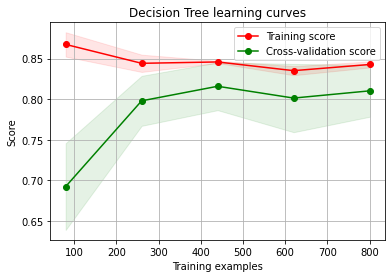

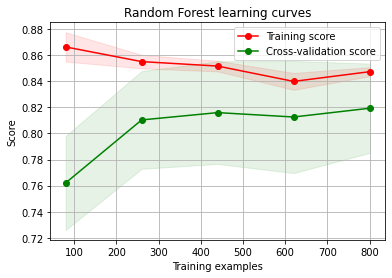

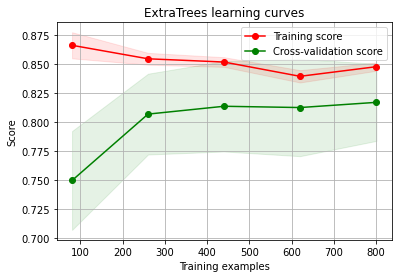

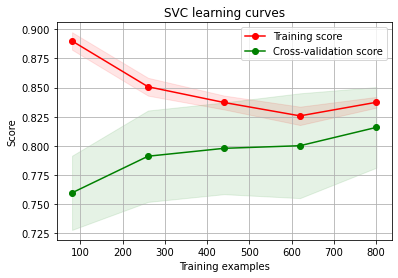

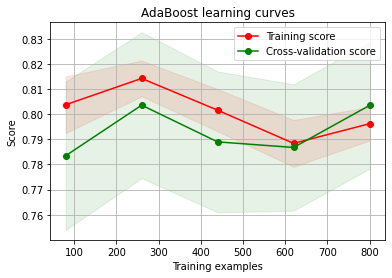

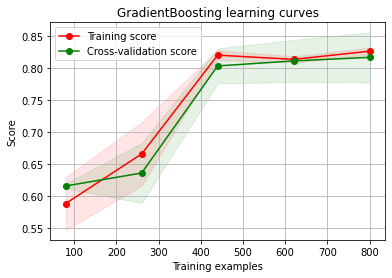

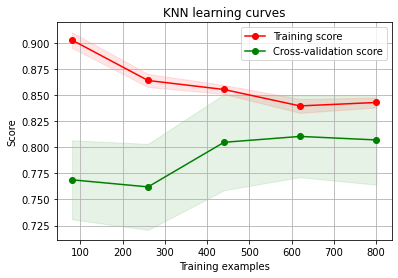

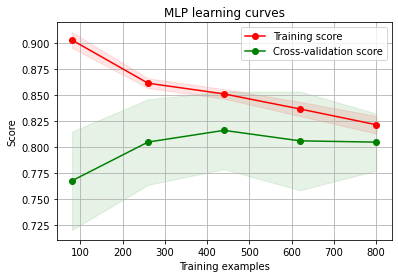

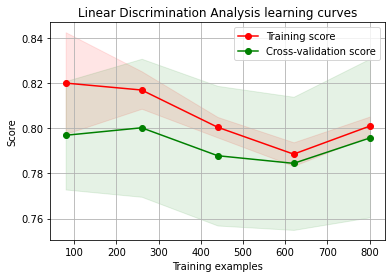

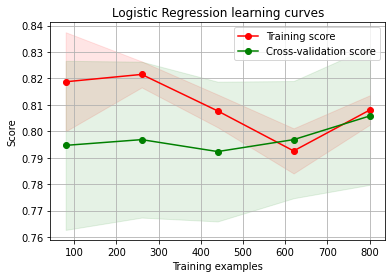

In [ ]:
g = plot_learning_curve(DTC_best,"Decision Tree learning curves",X_train_oh,y_train_oh,cv=kfold)
g = plot_learning_curve(RFC_best,"Random Forest learning curves",X_train_oh,y_train_oh,cv=kfold)
g = plot_learning_curve(Ext_best,"ExtraTrees learning curves",X_train_oh,y_train_oh,cv=kfold)
g = plot_learning_curve(SVM_best,"SVC learning curves",X_train_oh,y_train_oh,cv=kfold)
g = plot_learning_curve(ADA_best,"AdaBoost learning curves",X_train_oh,y_train_oh,cv=kfold)
g = plot_learning_curve(GBC_best,"GradientBoosting learning curves",X_train_oh,y_train_oh,cv=kfold)
g = plot_learning_curve(KNN_best,"KNN learning curves",X_train_oh,y_train_oh,cv=kfold)
g = plot_learning_curve(MLP_best,"MLP learning curves",X_train_oh,y_train_oh,cv=kfold)
g = plot_learning_curve(LDA_best,"Linear Discrimination Analysis learning curves",X_train_oh,y_train_oh,cv=kfold)
g = plot_learning_curve(LGS_best,"Logistic Regression learning curves",X_train_oh,y_train_oh,cv=kfold)

## 4-4. Feature Importances **시각화**

`argsort()`
* array를 정렬하는 인덱스 array를 반환한다.

예) 

a = np.array([7,2,3,1])

indicies = a.argsort()

indicies -> [3,1,2,0]

a[indicies] -> [1,2,3,7]


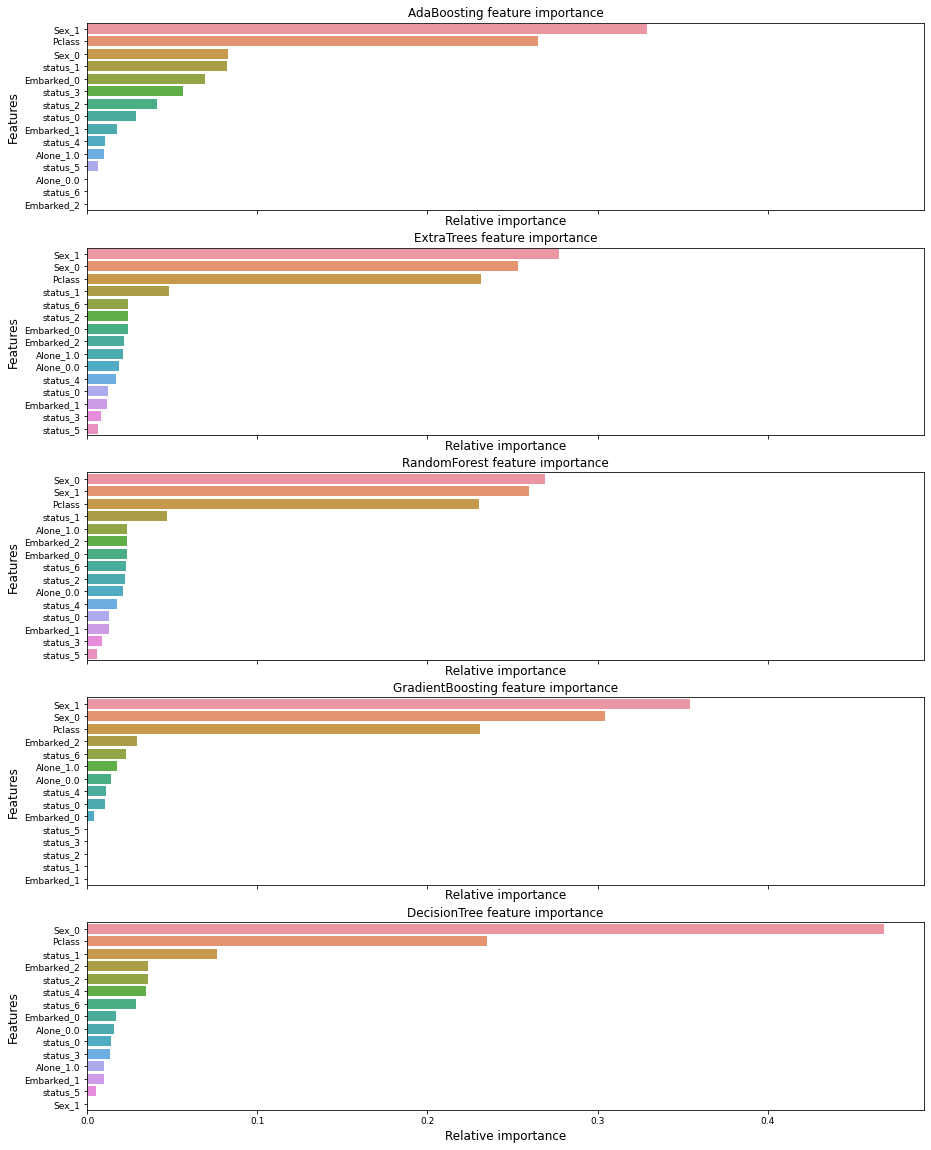

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 1, sharex="all", figsize=(15,20))

names_classifiers = [("AdaBoosting", ADA_best),("ExtraTrees",Ext_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best),('DecisionTree',DTC_best)]

nclassifier = 0
for row in range(nrows):
    # name, classifier 
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    # feature_importances_를 내림차순으로 정렬하여 indices에 저장
    indices = np.argsort(classifier.feature_importances_)[::-1]
    # 막대 그래프 plot
    g = sns.barplot(y=X_train_oh.columns[indices],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    # names_classifiers 리스트의 다음 classifier로 커서를 이동
    nclassifier += 1

* .feature_importances_ 속성을 지원하지 않는 모델은 제외하였다.
* 대체로 성별(Sex) 그 다음 객실등급(Pclass)가 생존여부를 예측하는 데에 중요하였다는 것을 알 수 있다.

## 4-5. 보팅

`보팅`: 앙상블 학습의 한 유형으로, 여러 개의 estimator의 예측값을 결합하여 최종 예측을 도출하는 기법이다.

`하드보팅`: 예측한 결과값 중 가장 다수의 분류기가 예측한 결과값을 최종 결과값으로 선정한다.

`소프트보팅`: 분류기들의 레이블 값 별 평균 결정 확률 계산하여 가장 평균 확률이 높은 레이블 값을 최종 결과값으로 선정한다.

In [ ]:
#튜닝한 파라미터로 하드보팅한 후 점수를 출력해보자.
grid_hard = VotingClassifier(estimators = [('Decision Tree', DTC_best), 
                                           ('Random Forest', RFC_best),
                                           ('ExtraTrees', Ext_best),
                                           ('SVC', SVM_best),
                                           ('AdaBoost', ADA_best),
                                           ('GradientBoosting', GBC_best),
                                           ('KNN', KNN_best),
                                           ('Linear Discrimination', LDA_best),
                                           ('MLP', MLP_best),
                                           ('Logistic Regression', LGS_best)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train_oh, y_train_oh, cv=10)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 82.04


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#튜닝한 파라미터로 하드보팅
grid_soft = VotingClassifier(estimators = [('Decision Tree', DTC_best), 
                                           ('Random Forest', RFC_best),
                                           ('ExtraTrees', Ext_best),
                                           ('SVC', SVM_best),
                                           ('AdaBoost', ADA_best),
                                           ('GradientBoosting', GBC_best),
                                           ('KNN', KNN_best),
                                           ('Linear Discrimination', LDA_best),
                                           ('MLP', MLP_best),
                                           ('Logistic Regression', LGS_best)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train_oh, y_train_oh, cv=10)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

Soft voting on test set score mean: 82.15


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


* 소프트 보팅의 점수가 더 높다.

# 5) csv 파일 저장

In [ ]:
# 학습
grid_hard.fit(X_train_oh, y_train_oh)

# 예측
predictions = grid_hard.predict(X_test_oh)
passId = [x for x in range(892, 1310)]

# 데이터프레임으로 변환
submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')
submission.columns = ["PassengerId", "Survived"]

# 하드보팅으로 예측한 최종 답안을 csv로 저장
submission.to_csv(PATH + 'titanic_submission1.csv', header = True, index = False)

In [ ]:
# 학습
grid_soft.fit(X_train_oh, y_train_oh)

# 예측
predictions = grid_soft.predict(X_test_oh)
passId = [x for x in range(892, 1310)]

# 데이터프레임으로 변환
submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')
submission.columns = ["PassengerId", "Survived"]

# 소프트보팅으로 예측한 최종 답안을 csv로 저장
submission.to_csv(PATH + 'titanic_submission2.csv', header = True, index = False)

* https://www.kaggle.com/c/titanic 대회 홈페이지에 들어가 csv 파일을 'commit
 버튼을 눌러 제출한다.
